In [1]:
%pylab inline
from astropy import constants
from astropy import units 
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
def H(z, Omega0, H_0):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z,Omega0, H_0):
    return Omega0 * (1+z)**3 * (H_0/H(z,Omega0, H_0))**2

def rho_crit(G, z, Omega0, H_0):
    H2 = H(z, Omega0, H_0)**2
    rho = 3*H2 / (8*np.pi*G)
    return rho

def rvir(Mvir, z):
    Mvir = Mvir * units.Msun
    G = constants.G
    G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
    H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
    H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))
    Omega0 = 0.27
    Deltavir = 360
    pcrit = rho_crit(G, z, Omega0 , H_0)
    Rvir = ( 3*Mvir / (4 * np.pi * Deltavir * pcrit * Omega0) )**(1/3.)
    return Rvir

In [11]:
def vc_plummer(a, r, M):
    #a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    vc = vc.to(units.km / units.s)
    return vc.value

def vc_Hernquist(a, r, M , G):
    #a = a*units.kpc
    vc = np.sqrt(G*M*r/(r+a)**2)
    vc = vc.to(units.km / units.s)
    return vc.value

def vc_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    #pcrit = rho_crit(G, 0, 0.27, H_0)
    #rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    #rvir = rvir.to(units.kpc)
    rvir = 258.0 * units.kpc
    a = rvir / c
    #print a
    vc = np.sqrt( ( M*G* (log(1 + r/a) - (r/a) / (1 + r/a)) )/r )
    vc = vc.to(units.km / units.s)
    return vc.value

def MN_vc(a, b, G, M, r, z=0):
    #z = z*units.kpc
    #a = a*units.kpc
    #b = b*units.kpc
    #r = r*units.kpc
    vc = r*np.sqrt(G*M / ( (r**2 + (a + b)**2)**(3/2.0) ))
    vc = vc.to(units.km / units.s)
    return vc.value

def vc_LMJ(x, y, z, r_halo, v, q1, q2, qz, phi):
    #x = x * units.kpc
    #y = y * units.kpc
    #z = z * units.kpc
    r_halo = r_halo * units.kpc
    v = v * units.km / units.s
    c1 = ( (np.cos(phi)**2 / q1**2 ) +  ( np.sin(phi)**2 / q2**2 ) )
    c2 = ( (np.cos(phi)**2 / q2**2 ) +  ( np.sin(phi)**2 / q1**2 ) )
    c3 = 2 * np.sin(phi) * np.cos(phi) * (  (1/q1**2) -  (1/q2**2) )
    den =  c1*x**2 + c2*y**2 + c3*x*y + (z/qz)**2 + r_halo**2 
    num = (  (2*c1*x + c3*y)**2 + (2*c2*y + c3*x)**2 + 4*z**2/qz**4  )**(1/2.)
    r = np.sqrt(x**2 + y**2 + z**2)
    vc = v*(np.sqrt(r * num / den) )
    return vc.value    

In [4]:
# G
G = constants.G
G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
# Masses 
Mb = 1E10 * units.Msun
MNFW = 1E12 * units.Msun
MMN = 5.5E10 * units.Msun
print Mb, MNFW, MMN
# Parameters
c = 12
a_bulge = 0.6 * units.kpc
a = 3.5 * units.kpc
b = 1.0 * units.kpc

10000000000.0 solMass 1e+12 solMass 55000000000.0 solMass


In [5]:
r = np.linspace(0, 20, 100)  * units.kpc
vc_bulge =  vc_Hernquist(a_bulge, r, Mb, G)
vc_disk = MN_vc(a, b, G, MMN, r, z=0)
vc_halo =  vc_NFW(c, r, MNFW, G)
vc =  np.sqrt(vc_bulge**2  + vc_disk**2 + vc_halo**2)

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:785: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


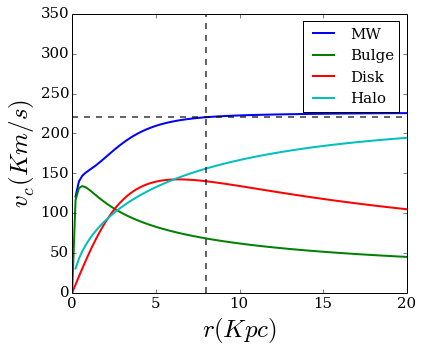

In [6]:
plt.figure(figsize=(6, 5))
plot(r, vc, lw=2, label='MW')
plot(r, vc_bulge, lw=2, label='Bulge')
plot(r, vc_disk, lw=2, label='Disk')
plot(r, vc_halo, lw=2, label='Halo')
plt.axvline(8, c='k', ls='--', lw=2, alpha=0.6)
plt.axhline(220, c='k', ls='--', lw=2, alpha=0.6)
legend(loc='best', fontsize=15)
ylim([0, 350])
xlabel('$r(Kpc)$', fontsize=25)
ylabel('$v_c(Km/s)$', fontsize=25)
savefig('MWBEsla07.png', bbox_inches='tight')

In [20]:
Mb = 3.4E10 * units.Msun
MNFW = 1E12 * units.Msun
MMN = 1E11 * units.Msun
print Mb, MNFW, MMN
# Parameters
#c = 12
a_bulge = 0.7 * units.kpc
a = 6.5 * units.kpc
b = 0.6 * units.kpc

34000000000.0 solMass 1e+12 solMass 1e+11 solMass


In [32]:
xvc = linspace(0, 25) * units.kpc 
yvc = linspace(0, 25) * units.kpc
zvc = linspace(0, 25) * units.kpc
r = np.sqrt(xvc**2 + yvc**2 + zvc**2)
vc_bulge =  vc_Hernquist(a_bulge, r, Mb, G)
vc_disk = MN_vc(a, b, G, MMN, r, z=0)
vc_halo =  vc_LMJ(xvc, yvc, zvc, 12, 135, 1.0, 1.0, 1.0, 0)
vc =  np.sqrt(vc_bulge**2  + vc_disk**2 + vc_halo**2)

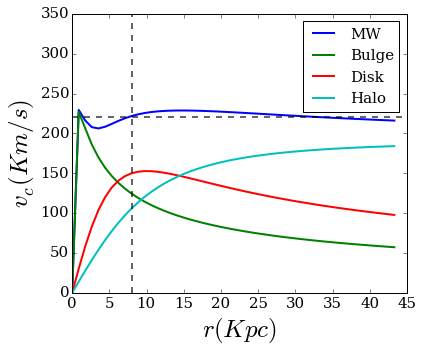

In [35]:
plt.figure(figsize=(6, 5))
plot(r, vc, lw=2, label='MW')
plot(r, vc_bulge, lw=2, label='Bulge')
plot(r, vc_disk, lw=2, label='Disk')
plot(r, vc_halo, lw=2, label='Halo')
plt.axvline(8, c='k', ls='--', lw=2, alpha=0.6)
plt.axhline(220, c='k', ls='--', lw=2, alpha=0.6)
legend(loc='best', fontsize=15)
ylim([0, 350])
xlabel('$r(Kpc)$', fontsize=25)
ylabel('$v_c(Km/s)$', fontsize=25)
savefig('MWLM10.png', bbox_inches='tight')